### Time series Dataset

We are using a public dataset of monthly carbon dioxide emissions from electricity generation available at the Energy Information Administration and Jason McNeill. The dataset includes CO2 emissions from each energy resource starting January 1973 to July 2016 for reference click https://www.kaggle.com/datasets/txtrouble/carbon-emissions.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [2]:
import warnings
import itertools
warnings.filterwarnings("ignore") # specify to ignore warning messages

In [3]:
co = pd.read_csv(r"C:\Users\Hany\Downloads\MER_T12_06.csv")
co.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [4]:
co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSN           5094 non-null   object
 1   YYYYMM        5094 non-null   int64 
 2   Value         5094 non-null   object
 3   Column_Order  5094 non-null   int64 
 4   Description   5094 non-null   object
 5   Unit          5094 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.9+ KB


The dataset has 6 columns where 2 of them are integer data type and 4 objects and 5096 observations. The above dataset retriving method only retrives the dataset as a dataframe that is not as a time series dataset. To read the dataset as a time series, we have to pass special arguments to the read_csv command as given below.

In [5]:
co['Description'].unique()

array(['Coal Electric Power Sector CO2 Emissions',
       'Natural Gas Electric Power Sector CO2 Emissions',
       'Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions',
       'Petroleum Coke Electric Power Sector CO2 Emissions',
       'Residual Fuel Oil Electric Power Sector CO2 Emissions',
       'Petroleum Electric Power Sector CO2 Emissions',
       'Geothermal Energy Electric Power Sector CO2 Emissions',
       'Non-Biomass Waste Electric Power Sector CO2 Emissions',
       'Total Energy Electric Power Sector CO2 Emissions'], dtype=object)

There are data about 6 industries and the dataset mainly focuses on how much each industry contributes every year.

In [6]:
co.head(50)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,197301,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,197302,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,197303,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,197304,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,197305,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5,CLEIEUS,197306,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
6,CLEIEUS,197307,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
7,CLEIEUS,197308,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
8,CLEIEUS,197309,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
9,CLEIEUS,197310,67.668,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


We can notice that there is an entry for 13th month every year, which is actually the total sales that year for the specific industry. Let us change the date format and remove the irrelevant entry.


In [7]:
co['YYYYMM'] = pd.to_datetime(co['YYYYMM'], format='%Y%m', errors='coerce')
df = co.dropna()
df.head(50)

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,CLEIEUS,1973-01-01,72.076,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
1,CLEIEUS,1973-02-01,64.442,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
2,CLEIEUS,1973-03-01,64.084,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
3,CLEIEUS,1973-04-01,60.842,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
4,CLEIEUS,1973-05-01,61.798,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
5,CLEIEUS,1973-06-01,66.538,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
6,CLEIEUS,1973-07-01,72.626,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
7,CLEIEUS,1973-08-01,75.181,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
8,CLEIEUS,1973-09-01,68.397,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide
9,CLEIEUS,1973-10-01,67.668,1,Coal Electric Power Sector CO2 Emissions,Million Metric Tons of Carbon Dioxide


In [8]:
df.isnull().sum()

MSN             0
YYYYMM          0
Value           0
Column_Order    0
Description     0
Unit            0
dtype: int64

In [9]:
df['Value'] = pd.to_numeric(df['Value'] , errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4707 entries, 0 to 5093
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MSN           4707 non-null   object        
 1   YYYYMM        4707 non-null   datetime64[ns]
 2   Value         4323 non-null   float64       
 3   Column_Order  4707 non-null   int64         
 4   Description   4707 non-null   object        
 5   Unit          4707 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 257.4+ KB


Dropping the null values

In [11]:
df.dropna(inplace=True)

In [12]:
CO2_sector = df.groupby('Description')['Value'].sum().sort_values(ascending = False)
CO2_sector

Description
Total Energy Electric Power Sector CO2 Emissions                                              82352.676
Coal Electric Power Sector CO2 Emissions                                                      65782.393
Natural Gas Electric Power Sector CO2 Emissions                                               11295.359
Petroleum Electric Power Sector CO2 Emissions                                                  4982.993
Residual Fuel Oil Electric Power Sector CO2 Emissions                                          4239.312
Distillate Fuel, Including Kerosene-Type Jet Fuel, Oil Electric Power Sector CO2 Emissions      404.887
Petroleum Coke Electric Power Sector CO2 Emissions                                              338.785
Non-Biomass Waste Electric Power Sector CO2 Emissions                                           281.367
Geothermal Energy Electric Power Sector CO2 Emissions                                            10.563
Name: Value, dtype: float64

As total emissions from all power sector is not comparable with others, we'll not consider the values of the Total Energy Electric Power Sector

In [13]:
CO2_sector = CO2_sector[CO2_sector.index != 'Total Energy Electric Power Sector CO2 Emissions']

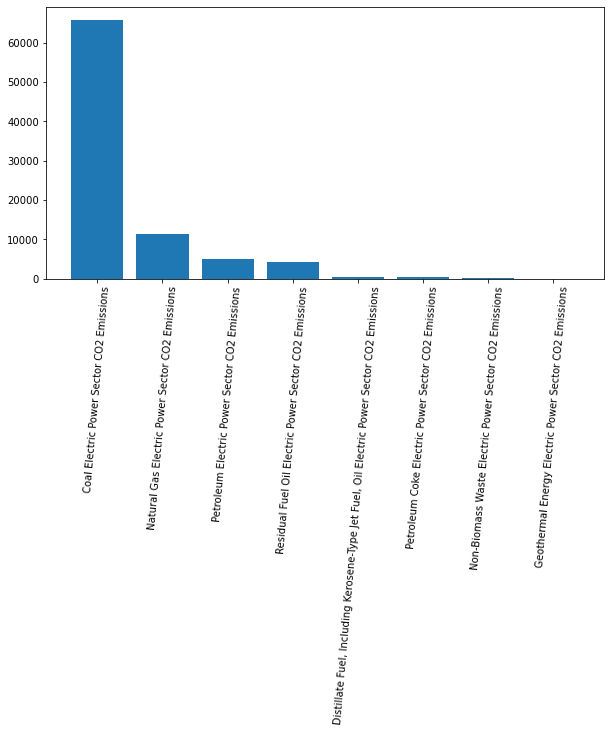

In [14]:
# CO2_sector.sort_values()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=85)
plt.bar(CO2_sector.index, CO2_sector.values)
plt.show()

From the above bar chart, we can easily identify which sector adds more value in CO2 emissions. In the time series analysis let's forecast on the CO2 emissions from Coal Electric Power sector

### Coal Electric Power sector CO2 emission Analysis

Plotting the year wise distribution of CO2 emission in Coal sector

In [15]:
df2= df[df['Description'] == 'Coal Electric Power Sector CO2 Emissions']
df2 = df2.drop(columns = ['MSN', 'Column_Order', 'Unit'])
df2.head()

,YYYYMM,Value,Description
0,1973-01-01,72.076,Coal Electric Power Sector CO2 Emissions
1,1973-02-01,64.442,Coal Electric Power Sector CO2 Emissions
2,1973-03-01,64.084,Coal Electric Power Sector CO2 Emissions
3,1973-04-01,60.842,Coal Electric Power Sector CO2 Emissions
4,1973-05-01,61.798,Coal Electric Power Sector CO2 Emissions


<AxesSubplot:title={'center':'CO2_emission'}, xlabel='YYYYMM'>

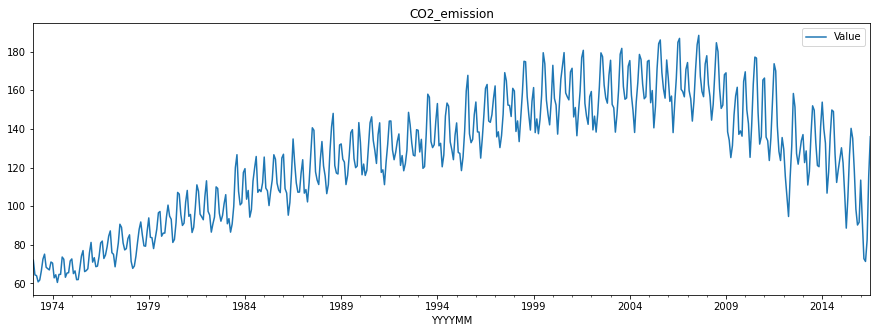

In [16]:
df2.plot(title='CO2_emission', x= 'YYYYMM', y='Value',figsize=(15, 5))

In [17]:
coal_emission = pd.Series(df2['Value'])
coal_emission.index = df2['YYYYMM']

In [18]:
coal_emission

YYYYMM
1973-01-01     72.076
1973-02-01     64.442
1973-03-01     64.084
1973-04-01     60.842
1973-05-01     61.798
               ...   
2016-03-01     72.840
2016-04-01     71.410
2016-05-01     82.510
2016-06-01    115.772
2016-07-01    135.958
Name: Value, Length: 523, dtype: float64

From the above chart, we can visualize both seasonality and trend in the CO2 emission over the years. To get a clearer idea about seasonality let's look into a portion of the data, say 4 year data

In [19]:
coal_emissions_2015 = df2[df2['YYYYMM'].dt.year.isin([2015])]
coal_emissions_5 = df2[df2['YYYYMM'].dt.year.isin([2016, 2015, 2014, 2013, 2012])]
coal_emissions_2 = df2[df2['YYYYMM'].dt.year.isin([2015, 2014])]

<AxesSubplot:title={'center':'CO2 emissions'}, xlabel='YYYYMM'>

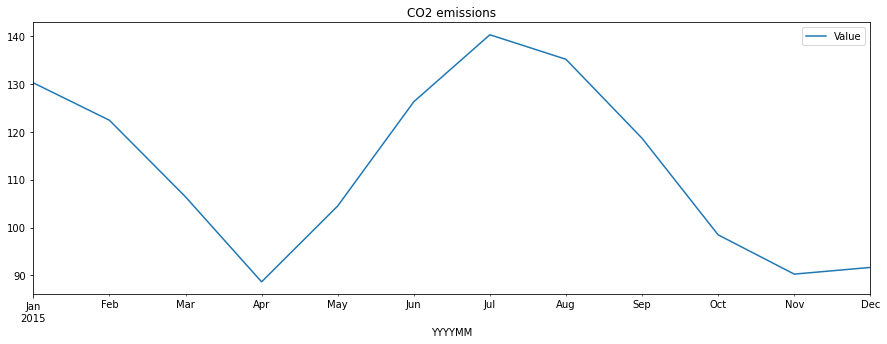

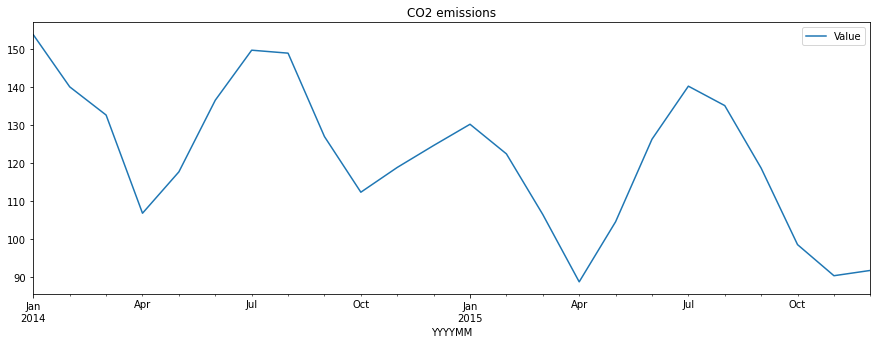

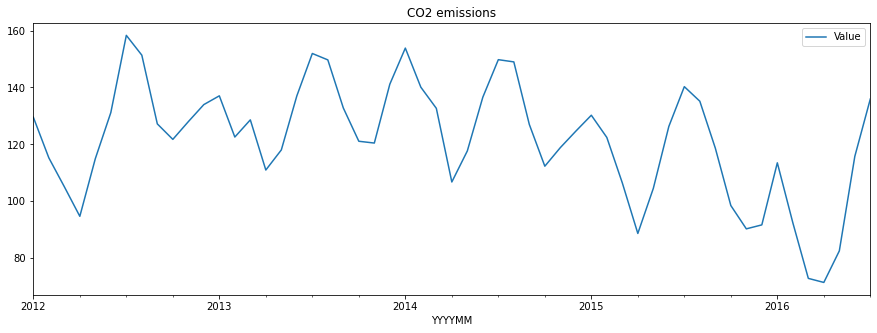

In [20]:
coal_emissions_2015.plot(title = 'CO2 emissions', x='YYYYMM',y='Value',figsize = (15,5))
coal_emissions_2.plot(title = 'CO2 emissions', x='YYYYMM',y='Value',figsize = (15,5))
coal_emissions_5.plot(title = 'CO2 emissions', x='YYYYMM',y='Value',figsize = (15,5))

Analysing the above plots we can clearly see a 6 month seasonality in the data, there is a peak in the CO2 emissions during Jan and July of the year and a drop during Apr and Oct-Nov months. From the figures, it is evident that there is a trend in the CO2 emission dataset with seasonal variation. So, we can infer a concluding remark that the dataset is not stationary.

### Testing Stationarity

By analysing the data, we already got an idea that the data contains some sort of trend and seasonality. Now, we will use a statistical method to assess the trend and seasonality of the dataset. After trend and seasonality are assessed if they are present in the dataset, they will be removed from the series to transform the nonstationary dataset into stationary and the residuals are further analyzed.

#### Test stationary using Dickey-Fuller

In [21]:
def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 6, center = False).mean()
    rol_std = ts.rolling(window = 6, center = False).std()
    plt.figure(figsize=(15,5))
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    
    plt.xlabel('Time in Years', fontsize = 15)
    plt.ylabel('Total Emissions', fontsize = 15)
    plt.legend(loc='best', fontsize = 15)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 15)
    plt.show(block= True)

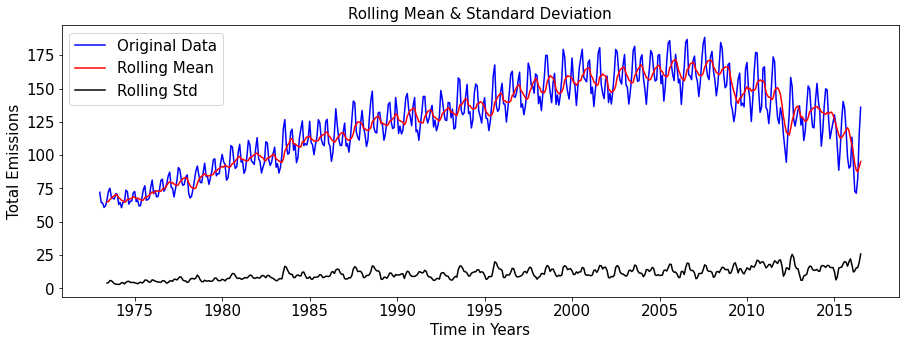

In [22]:
TestStationaryPlot(coal_emission)

Hypothesis:
    
Null Hypothesis H0 : CO2 emissions in coal industry is non-stationary.

Alternate Hypothesis : CO2 emissions in coal industry is stationary.

In [23]:
def TestAdFuller(data):
    test = adfuller(data, autolag = 'AIC')
    test_output = pd.Series(test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    return test_output

In [24]:
TestAdFuller(df2['Value'])

Test Statistic                  -1.827631
p-value                          0.366833
#Lags Used                      14.000000
Number of Observations Used    508.000000
dtype: float64

Taking the threshold as 0.05, the obtained p-value 0.367 > 0.05 implies failed to reject the null hypothesis and the data is non-stationary

### Transforming to stationary

##### Moving Average

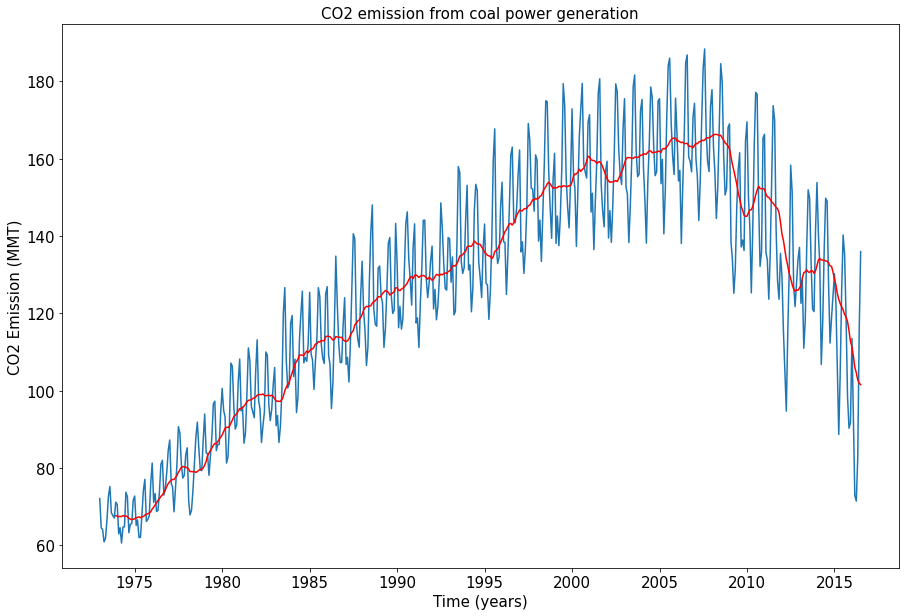

In [25]:
plt.figure(figsize=(15,10))
moving_avg = coal_emission.rolling(12).mean()
plt.plot(coal_emission)
plt.plot(moving_avg, color='red')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Time (years)', fontsize = 15)
plt.ylabel('CO2 Emission (MMT)', fontsize = 15)
plt.title('CO2 emission from coal power generation', fontsize = 15)
plt.show()

In [26]:
#AdFullerTest
TestAdFuller(moving_avg.dropna(inplace= False))

Test Statistic                  -1.982013
p-value                          0.294515
#Lags Used                      13.000000
Number of Observations Used    498.000000
dtype: float64

There is not much improvement in the stationarity of the series.

#### Eliminating Trend with First Difference

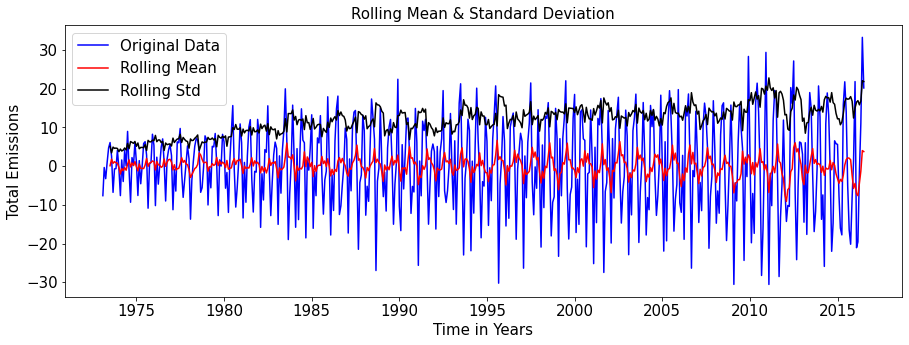

YYYYMM
1973-01-01       NaN
1973-02-01    -7.634
1973-03-01    -0.358
1973-04-01    -3.242
1973-05-01     0.956
               ...  
2016-03-01   -19.576
2016-04-01    -1.430
2016-05-01    11.100
2016-06-01    33.262
2016-07-01    20.186
Name: Value, Length: 523, dtype: float64

In [27]:
first_difference = coal_emission - coal_emission.shift(1)  
TestStationaryPlot(first_difference.dropna(inplace=False))
first_difference

In [28]:
#Taking the Dickey Fuller Test to check for stationarity
TestAdFuller(first_difference.dropna(inplace=False))

Test Statistic                  -5.302531
p-value                          0.000005
#Lags Used                      13.000000
Number of Observations Used    508.000000
dtype: float64

By taking the first difference, we can see the improvement in the stationarity of the series.

#### Eliminating seasonality with seasonal difference

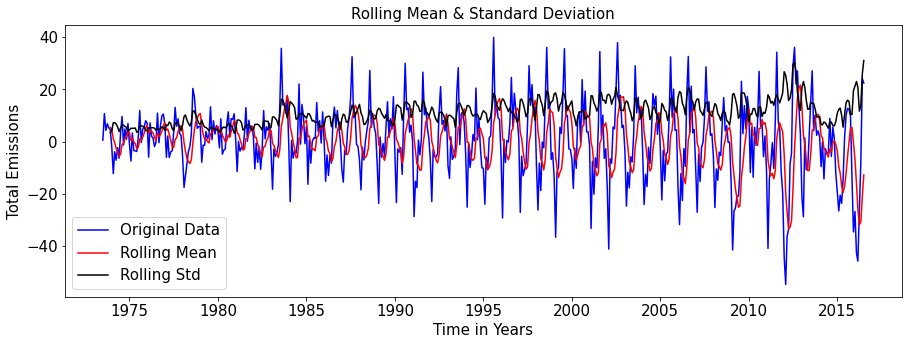

YYYYMM
1973-01-01       NaN
1973-02-01       NaN
1973-03-01       NaN
1973-04-01       NaN
1973-05-01       NaN
               ...  
2016-03-01   -45.813
2016-04-01   -27.059
2016-05-01    -7.753
2016-06-01    24.114
2016-07-01    22.463
Name: Value, Length: 523, dtype: float64

In [29]:
coal_seasonal_diff = coal_emission - coal_emission.shift(6)
TestStationaryPlot(coal_seasonal_diff.dropna(inplace=False))
coal_seasonal_diff

In [30]:
#Taking the Dickey Fuller Test to check for stationarity
TestAdFuller(first_difference.dropna(inplace=False))

Test Statistic                  -5.302531
p-value                          0.000005
#Lags Used                      13.000000
Number of Observations Used    508.000000
dtype: float64

Same stationarity as that of the first difference

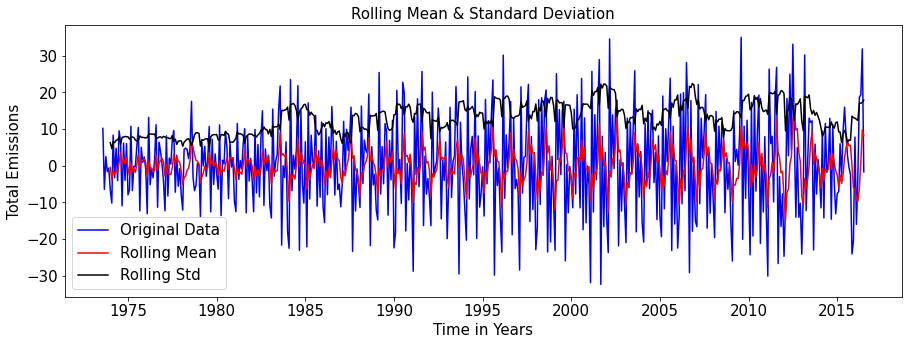

YYYYMM
1973-01-01       NaN
1973-02-01       NaN
1973-03-01       NaN
1973-04-01       NaN
1973-05-01       NaN
               ...  
2016-03-01    -3.073
2016-04-01    18.754
2016-05-01    19.306
2016-06-01    31.867
2016-07-01    -1.651
Name: Value, Length: 523, dtype: float64

In [31]:
# Taking the first seasonal difference
seasonal_first = first_difference - first_difference.shift(6)
TestStationaryPlot(seasonal_first.dropna(inplace = False))
seasonal_first

In [32]:
#Taking AdFuller test to test for stationarity
TestAdFuller(seasonal_first.dropna(inplace=False))

Test Statistic                -8.364396e+00
p-value                        2.767985e-13
#Lags Used                     1.700000e+01
Number of Observations Used    4.980000e+02
dtype: float64

The data is highly improved in terms of stationarity

Taking second difference

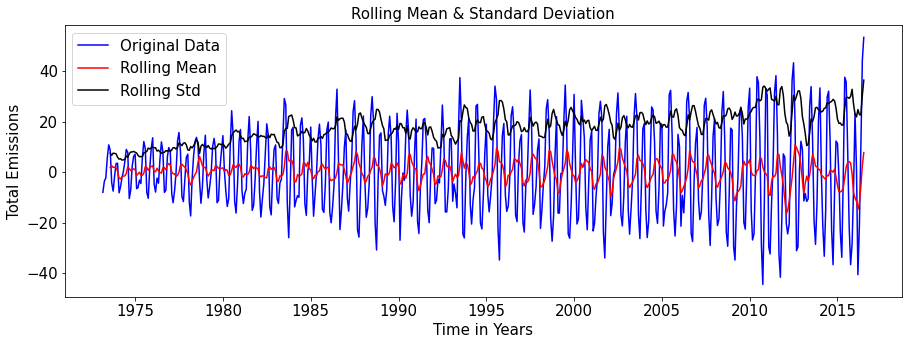

YYYYMM
1973-01-01       NaN
1973-02-01       NaN
1973-03-01    -7.992
1973-04-01    -3.600
1973-05-01    -2.286
               ...  
2016-03-01   -40.655
2016-04-01   -21.006
2016-05-01     9.670
2016-06-01    44.362
2016-07-01    53.448
Name: Value, Length: 523, dtype: float64

In [33]:
coal_sec_diff = coal_emission - coal_emission.shift(2)
TestStationaryPlot(coal_sec_diff.dropna(inplace = False))
coal_sec_diff

In [34]:
TestAdFuller(coal_sec_diff.dropna(inplace=False))

Test Statistic                  -5.241312
p-value                          0.000007
#Lags Used                      12.000000
Number of Observations Used    508.000000
dtype: float64

Taking the seasonal difference from the second differenced data

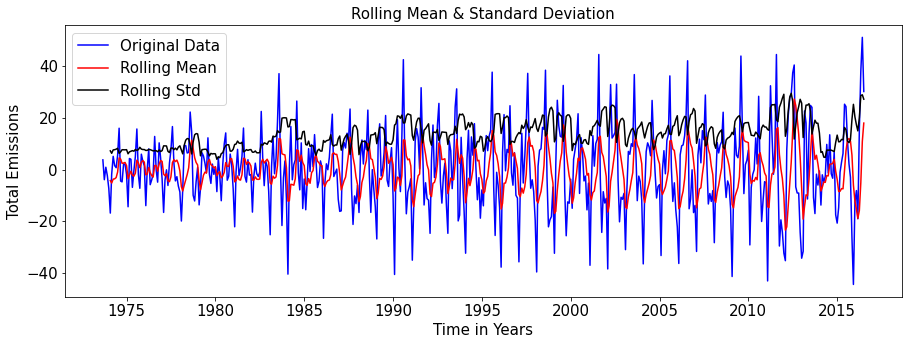

YYYYMM
1973-01-01       NaN
1973-02-01       NaN
1973-03-01       NaN
1973-04-01       NaN
1973-05-01       NaN
               ...  
2016-03-01   -19.025
2016-04-01    15.681
2016-05-01    38.060
2016-06-01    51.173
2016-07-01    30.216
Name: Value, Length: 523, dtype: float64

In [35]:
# Taking the second seasonal difference
seasonal_sec = coal_sec_diff - coal_sec_diff.shift(6)
TestStationaryPlot(seasonal_sec.dropna(inplace = False))
seasonal_sec

In [36]:
#Testing for stationarity with AdFuller Test
TestAdFuller(seasonal_sec.dropna(inplace=False))


Test Statistic                -8.740248e+00
p-value                        3.022523e-14
#Lags Used                     1.900000e+01
Number of Observations Used    4.950000e+02
dtype: float64

There is a good amount of improvement in the stationarity of the data.

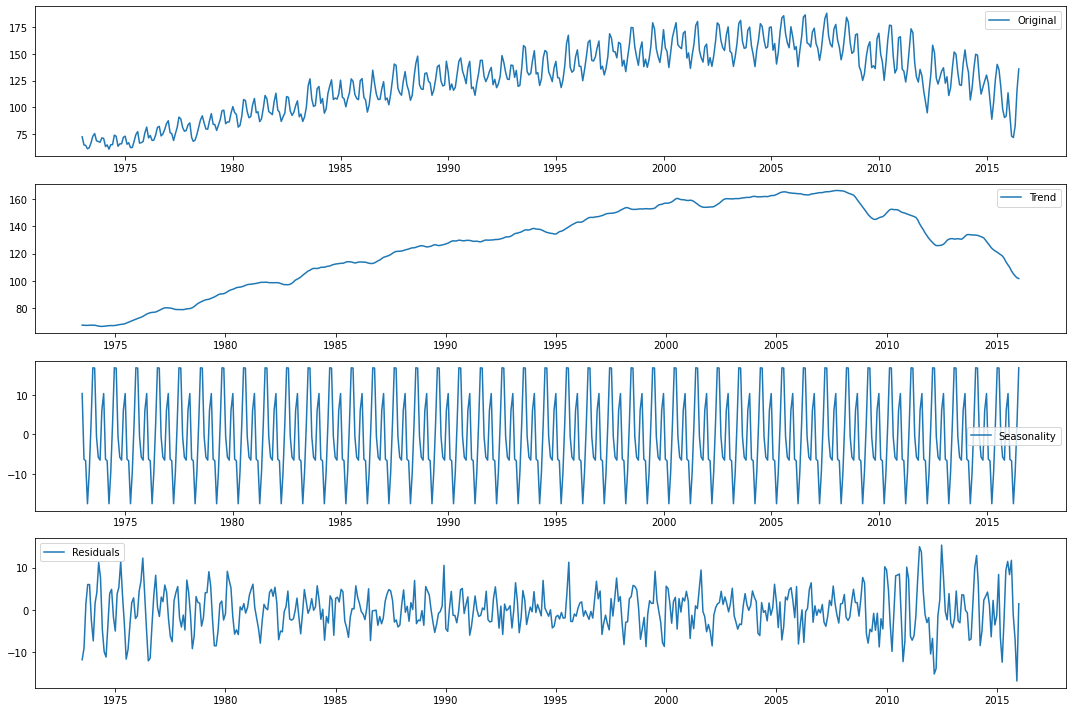

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(coal_emission)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(15,10))
plt.subplot(411)
plt.plot(coal_emission, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()


As we can still see some fluctuations in the data, let's analyze if there is some information in the residual in the dataset

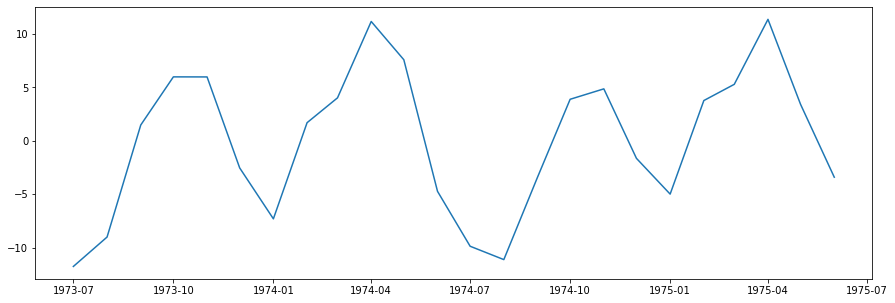

In [38]:
plt.figure(figsize=(15,5))
plt.plot(residual.dropna(inplace=False).head(24),label='Residuals')

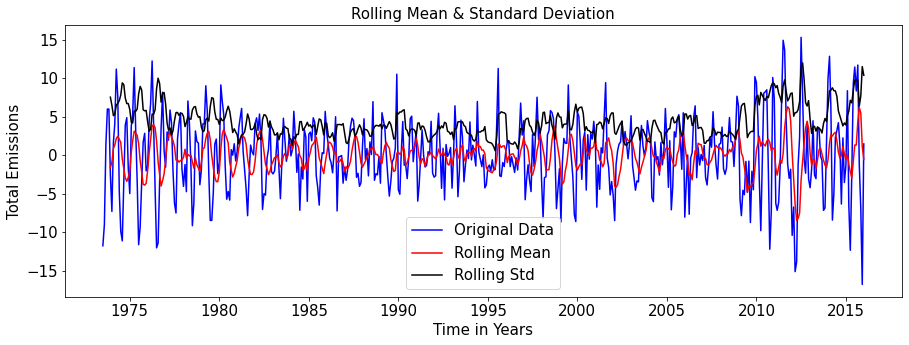

In [39]:
TestStationaryPlot(residual.dropna(inplace=False))

In [40]:
TestAdFuller(residual.dropna(inplace=False))

Test Statistic                -1.030709e+01
p-value                        3.257381e-18
#Lags Used                     1.400000e+01
Number of Observations Used    4.960000e+02
dtype: float64

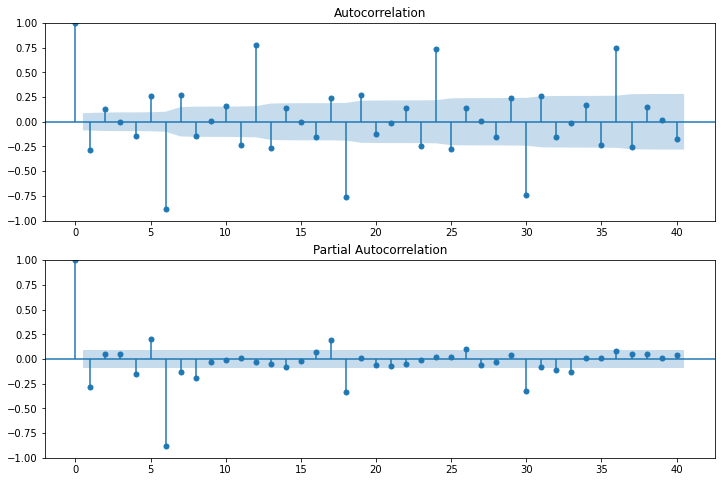

In [42]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(seasonal_first.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(seasonal_first.iloc[13:], lags=40, ax=ax2)

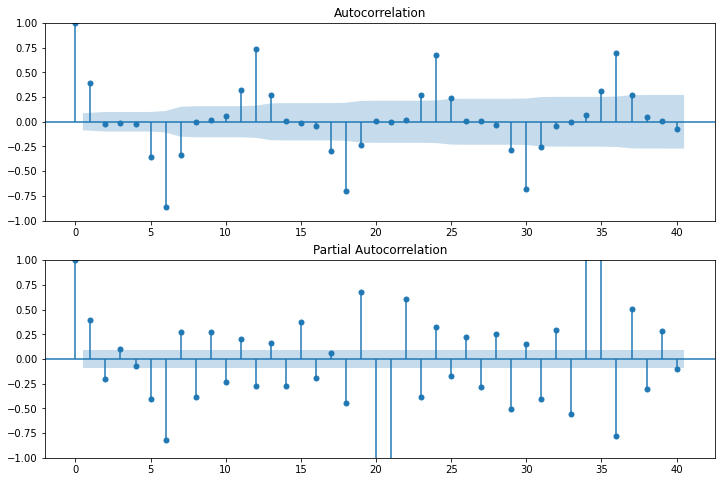

In [43]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(seasonal_sec.iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(seasonal_sec.iloc[13:], lags=40, ax=ax2)

Considering different p,d,q values for ARIMA

In [77]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))
pdq_x_QDQs

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 6)
SARIMAX: (0, 1, 0) x (0, 1, 0, 6)


[(0, 0, 0, 6),
 (0, 0, 1, 6),
 (0, 1, 0, 6),
 (0, 1, 1, 6),
 (1, 0, 0, 6),
 (1, 0, 1, 6),
 (1, 1, 0, 6),
 (1, 1, 1, 6)]

In [78]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(coal_emission,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
        except:
#             print('l')
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 6) - AIC:6563.79623922923
ARIMA(0, 0, 0)x(0, 0, 1, 6) - AIC:5971.043903087642
ARIMA(0, 0, 0)x(0, 1, 0, 6) - AIC:4188.336081025884
ARIMA(0, 0, 0)x(0, 1, 1, 6) - AIC:3891.1917563428856
ARIMA(0, 0, 0)x(1, 0, 0, 6) - AIC:4196.759710488024
ARIMA(0, 0, 0)x(1, 0, 1, 6) - AIC:3934.7347930999067
ARIMA(0, 0, 0)x(1, 1, 0, 6) - AIC:3629.4839093999926
ARIMA(0, 0, 0)x(1, 1, 1, 6) - AIC:3524.0092231235244
ARIMA(0, 0, 1)x(0, 0, 0, 6) - AIC:5887.028557033107
ARIMA(0, 0, 1)x(0, 0, 1, 6) - AIC:5380.316405307635
ARIMA(0, 0, 1)x(0, 1, 0, 6) - AIC:4051.3375063243993
ARIMA(0, 0, 1)x(0, 1, 1, 6) - AIC:3690.2817840801035
ARIMA(0, 0, 1)x(1, 0, 0, 6) - AIC:4099.457809374073
ARIMA(0, 0, 1)x(1, 0, 1, 6) - AIC:3732.160361638441
ARIMA(0, 0, 1)x(1, 1, 0, 6) - AIC:3364.347156647701
ARIMA(0, 0, 1)x(1, 1, 1, 6) - AIC:3312.084584968831
ARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:4046.0808611789744
ARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:3979.296024245731
ARIMA(0, 1, 0)x(0, 1, 0, 6) - AIC:4114.348091802931
ARIMA(

In [92]:
# applying seasonal arima
mod = sm.tsa.statespace.SARIMAX(coal_emission, 
                                order=(1,0,1), 
                                seasonal_order=(1,1,1,6),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             Value   No. Observations:                  523
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 6)   Log Likelihood               -1582.142
Date:                           Thu, 05 Jan 2023   AIC                           3174.285
Time:                                   04:21:32   BIC                           3195.447
Sample:                               01-01-1973   HQIC                          3182.583
                                    - 07-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8869      0.022     40.167      0.000       0.844       0.930
ma.L1         -0.2528      0.046     -5.521

Plotting the residuals and checking if there is any extra information left to be extracted from the residuals

<AxesSubplot:xlabel='YYYYMM'>

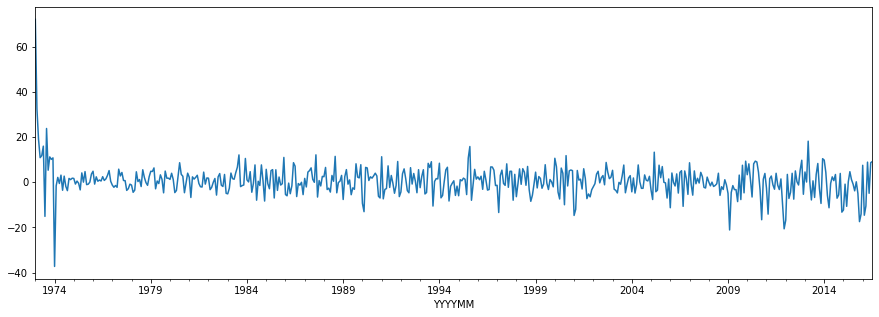

In [69]:
plt.figure(figsize=(15,5))
results.resid.plot()

<AxesSubplot:ylabel='Density'>

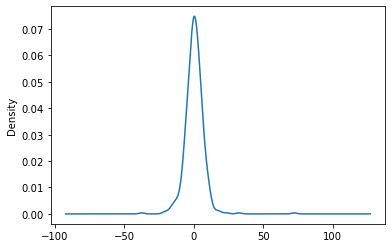

In [70]:
results.resid.plot(kind='kde')

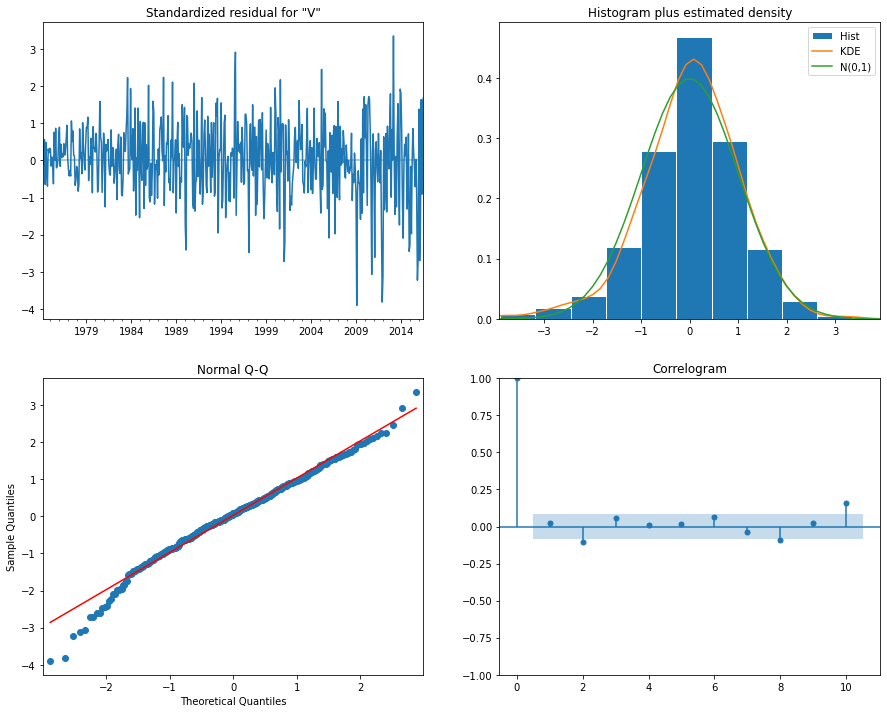

In [71]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean. If the seasonal ARIMA model does not satisfy these properties, it is a good indication that it can be further improved.

### Forecasting

In [97]:
# Get forecast of 10 years or 120 months steps ahead in future
forecast = results.get_forecast(steps= 120)
# Get confidence intervals of forecasts
forecast_ci = forecast.conf_int()
forecast_ci.head()

,lower Value,upper Value
2016-08-01,119.485640,140.711090
2016-09-01,102.044987,127.177592
2016-10-01,80.256512,108.079405
2016-11-01,75.473365,105.241956
2016-12-01,78.239693,109.453567


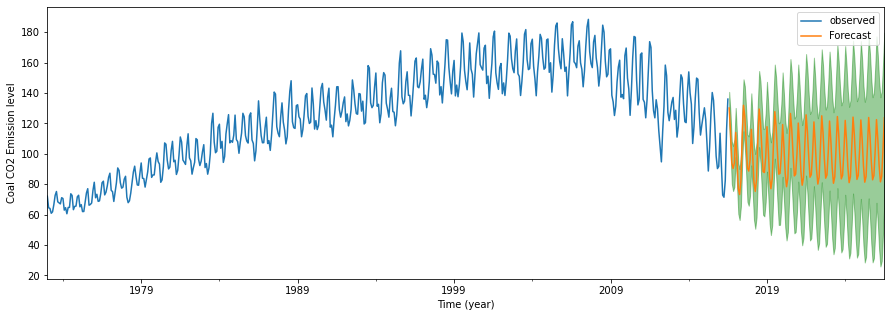

In [104]:
ax = coal_emission.plot(label='observed', figsize=(15, 5))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('Coal CO2 Emission level')

plt.legend()
plt.show()

### Validating Prediction 

In [79]:
pred = results.get_prediction(start = 480, end = 523, dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower Value,upper Value
2013-01-01,119.968980,141.345058
2013-02-01,109.688629,131.064708
2013-03-01,98.912416,120.288495
2013-04-01,97.356368,118.732446
2013-05-01,108.125869,129.501948


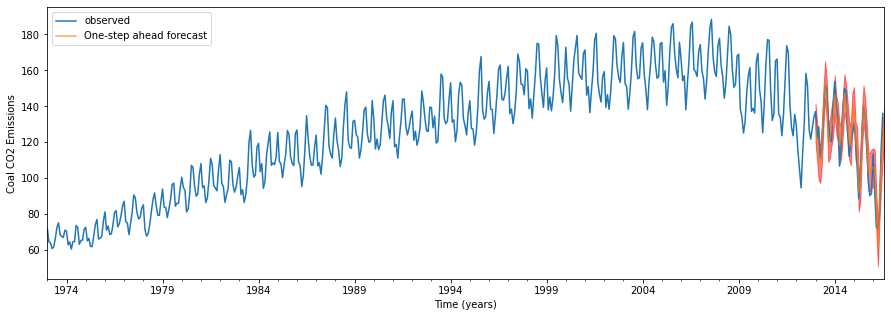

In [83]:
plt.figure(figsize=(15,5))
ax = coal_emission['1973':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='r', alpha=.5)

ax.set_xlabel('Time (years)')
ax.set_ylabel('Coal CO2 Emissions')
plt.legend()

plt.show()

In [84]:
mte_forecast = pred.predicted_mean
mte_truth = coal_emission['2013-01-31':]

# Compute the mean square error
mse = ((mte_forecast - mte_truth) ** 2).mean()
print('The Mean Squared Error (MSE) of the forecast is {}'.format(round(mse, 2)))
print('The Root Mean Square Error (RMSE) of the forcast: {:.4f}'
      .format(np.sqrt(sum((mte_forecast-mte_truth)**2)/len(mte_forecast))))

The Mean Squared Error (MSE) of the forecast is 64.01
The Root Mean Square Error (RMSE) of the forcast: nan


In [85]:
mte_pred_concat = pd.concat([mte_truth, mte_forecast])

In [87]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2013-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

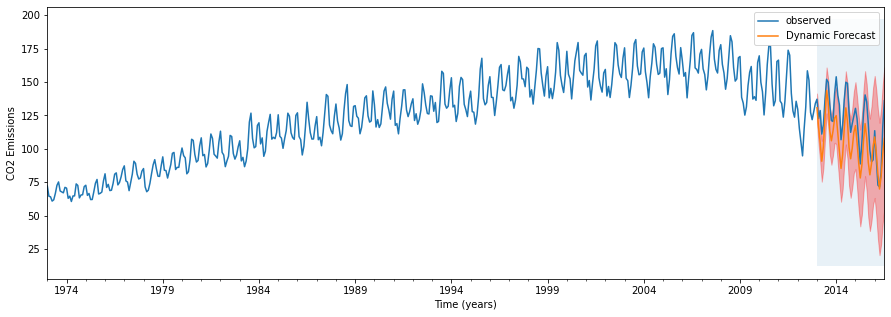

In [94]:
ax = coal_emission['1973':].plot(label='observed', figsize=(15, 5))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], 
                color='r', 
                alpha=.3)

ax.fill_betweenx(ax.get_ylim(), 
                 pd.to_datetime('2013-01-31'), 
                 coal_emission.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time (years)')
ax.set_ylabel('CO2 Emissions')

plt.legend()
plt.show()

### Conclusion

In this notebook, we have explored how to retrieve CSV dataset, how to transform the dataset into times series, testing if the time series is stationary or not using graphical and Dickey-Fuller test statistic methods, how to transform time series to stationary, how to find optimal parameters to build SARIMA model using grid search method, diagnosing time series prediction, validating the predictive power, forecasting 10 year future CO2 emission from power generation using coal power.